### This notebook computes the joint likelihood in 5 dimensions for the parameters of interest (see below). See inference_demo for more details about basic usage

In [1]:
from lenslikelihood.measurements import flux_measurements, flux_measurement_uncertainties, all_lens_names, all_param_ranges_version2
import numpy as np

# Note that the syntax for the uncertainties is
# {'lens_name': (1-sigma-uncertainty, reference_index, uncertainty_in_ratio)}
# where reference_index is the reference image with which to compute the flux ratio, and uncertainty_in_ratio specifies
# whether the measurement uncertainty refers to the flux or the flux ratio

for name in all_lens_names:
    print(name)
    print('fluxes/flux ratios measured: ', flux_measurements[name])
    print('uncertainties: ', flux_measurement_uncertainties[name])
    print('\n')

HE0435
fluxes/flux ratios measured:  [0.96  0.976 1.    0.65 ]
uncertainties:  ([0.05, 0.049, 0.048, 0.056], 0, False)


WGD2038
fluxes/flux ratios measured:  [0.86 1.   0.79 0.4 ]
uncertainties:  ([0.01, 0.01724137931034483, 0.021739130434782608, 0.021739130434782608], 0, False)


B1422
fluxes/flux ratios measured:  [0.88  1.    0.474 0.025]
uncertainties:  ([0.011363636363636364, 0.01, 0.012765957446808512, None], 0, False)


WFI2033
fluxes/flux ratios measured:  [1.   0.65 0.5  0.53]
uncertainties:  ([0.03, 0.046875, 0.04, 0.03773584905660377], 0, False)


PSJ1606
fluxes/flux ratios measured:  [1.   1.   0.59 0.79]
uncertainties:  ([0.03, 0.03, 0.03333333333333333, 0.02564102564102564], 0, False)


WFI2026
fluxes/flux ratios measured:  [1.   0.75 0.31 0.28]
uncertainties:  ([0.02, 0.02666666666666667, 0.06451612903225806, 0.03571428571428571], 0, False)


RXJ0911
fluxes/flux ratios measured:  [0.56 1.   0.53 0.24]
uncertainties:  ([0.07142857142857142, 0.05, 0.07547169811320754, 0.1

### Models implemented for the halo mass function and concentration-mass relation

The full set of hyper-parameters we're interested in constraining are defined by the parameterizations of the halo mass function and concentration-mass relation. They are $\Sigma_{\rm{sub}}$, $\delta_{\rm{LOS}}$, $\Delta \alpha$, $q$, $c_8$, and $\beta$. The first four define to the subhalo and field halo mass functions, and the last two define the concentration-mass relation. 

The field halo mass function is parameterized as
\begin{equation}
\frac{dN_{\rm{LOS}}}{dm dV} = \delta_{\rm{LOS}} \left(1+\xi_{\rm{2halo}}\right) \left(\frac{m}{10^8}\right)^{\Delta \alpha} \ \frac{dN_{\rm{ShethTormen}}}{dm dV}
\end{equation}
where $\delta_{\rm{LOS}}$ scales the overall normalization, and $\Delta \alpha$ parameterizes deviations from the logarithmic slope predicted by CDM around $10^8 M_{\odot}$. 

The subhalo mass function is parameterized as
\begin{equation}
\frac{dN_{\rm{sub}}}{dm dA} \sim \Sigma_{\rm{sub}} \ \left(\frac{m}{10^8}\right)^{\alpha + q \Delta \alpha}
\end{equation}
where $\Sigma_{\rm{sub}}$ is the normalization, $\alpha$ is the logarithmic slope predicted by CDM, $\Delta \alpha$ parameterizes deviations from the value predicted by CDM, and $q$ controls the coupling between the line of sight halo mass function slope and the subhalo mass function slope. When $q=1$ the slopes change in the same way, and when $q=0$ the slopes of the subhalo and field halo mass functions are completely decoupled. 

The concentration-mass relation is parameterized as 

\begin{equation}
c\left(M, z\right) = c_8 \left(1+z\right)^{\zeta} \left(\frac{\nu\left(M, z\right)}{\nu\left(10^8, z\right)}\right)^{-\beta}
\end{equation}
i.e. it is a power-law in the peak height $\nu$ with normalization $c_8$ at $10^8$ and a logarithmic slope $\beta$. The parameter $\zeta$ modifies the redshift evolution and is marginalized over in the sampling. 

The parameter names used in the python code have the following correspondence: 


1) sigma_sub = $\Sigma_{\rm{sub}}$

2) delta_power_law_index = $\Delta \alpha$

3) c0 = $c_8$

4) beta = $\beta$

5) delta_power_law_index_coupling = $q$

6) LOS_normalization = $\delta_{\rm{LOS}}$

### Example inference on three parameters with a subset of lenses

First load the model samples, define what parameters we want to look at

In [2]:
import pickle
import matplotlib.pyplot as plt
# specify the parameter names
param_names = ['LOS_normalization', 'beta', 'log10c0', 'delta_power_law_index', 'sigma_sub']

param_ranges = [all_param_ranges_version2[name] for name in param_names]
print(param_ranges)
# specify the lenses to use
lenses = all_lens_names
raw_samples_dict = {}
# load the forward model samples
for lens in lenses:
#for lens in ['HE0435']:
    print(lens)
    f = open('./../raw_samples/power_spectrum/'+lens+'_logprior', 'rb')
    raw_samples = pickle.load(f)
    f.close()
    raw_samples_dict[lens] = raw_samples 
    print('number of samples: ', len(raw_samples.samples_dictionary['beta']))

[[0.0, 2.5], [-0.2, 15.0], [0, 4], [-0.6, 0.9], [0, 0.125]]
HE0435
number of samples:  2177080
WGD2038
number of samples:  1486760
B1422
number of samples:  1281430
WFI2033
number of samples:  1775092
PSJ1606
number of samples:  1774039
WFI2026
number of samples:  1383086
RXJ0911
number of samples:  1590968
MG0414
number of samples:  1724080
PG1115
number of samples:  2252901
RXJ1131
number of samples:  7832445
WGDJ0405
number of samples:  8922308


The next cell computes the joint likelihood without any importance sampling weights.

3500
working on lens HE0435... 


/Users/danielgilman/Code/lenslikelihood/lenslikelihood/extract_raw_samples.py:154: RuntimeWarning: divide by zero encountered in true_divide
  fr = fluxes[row, :] / fluxes[row, flux_ratio_index]
/Users/danielgilman/Code/lenslikelihood/lenslikelihood/extract_raw_samples.py:154: RuntimeWarning: invalid value encountered in true_divide
  fr = fluxes[row, :] / fluxes[row, flux_ratio_index]


3500
working on lens WGD2038... 
3500
working on lens B1422... 


/Users/danielgilman/Code/lenslikelihood/lenslikelihood/extract_raw_samples.py:141: RuntimeWarning: invalid value encountered in add
  fluxes_perturbed[:, i] = fluxes[:, i] + df


3500
working on lens WFI2033... 
3500
working on lens PSJ1606... 
3500
working on lens WFI2026... 
3500
working on lens RXJ0911... 
3500
working on lens MG0414... 
3500
working on lens PG1115... 
3500
working on lens RXJ1131... 
3500
working on lens WGDJ0405... 


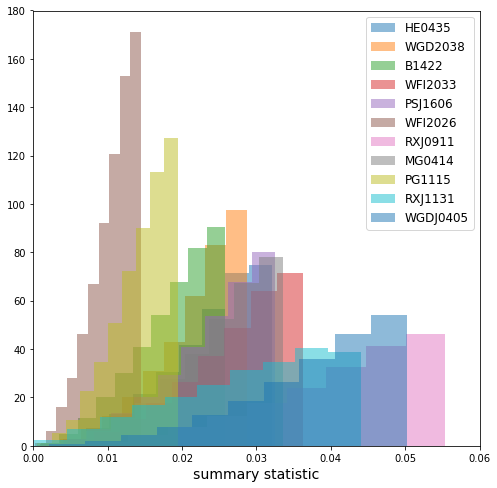

In [3]:
# compute the summary statistics, retaining the 1500 sets of model parameters with lowest summary statistic
n_samples_keep_list = [3500] * len(lenses)
# n_samples_keep_list[-4] = 2500
# n_samples_keep_list[-3] = 2500
# n_samples_keep_list[0] = 2500
samples_dict = {}
fig = plt.figure(1)
fig.set_size_inches(8,8)
for n_samples_keep, lens in zip(n_samples_keep_list, lenses):
#for n_samples_keep, lens in zip([3500], ['B1422']):
    print(n_samples_keep)
    print('working on lens '+str(lens) + '... ')
    measured_fluxes = flux_measurements[lens]
    measurement_uncertainties = flux_measurement_uncertainties[lens][0]
    reference_index = flux_measurement_uncertainties[lens][1]
    uncertaintiy_in_flux_ratios = flux_measurement_uncertainties[lens][2]
    
    importance_sampling_weights = None
    
    samples, full_samples, statistic = raw_samples_dict[lens].sample_with_abc(measured_fluxes, 
                                                                   param_names, 
                                                                   measurement_uncertainties, 
                                                                   reference_index, 
                                                                   n_samples_keep,  
                                                                    n_draw=10,
                                                                   uncertaintiy_in_ratios=uncertaintiy_in_flux_ratios,
                                                                   importance_sampling_weights=importance_sampling_weights,
                                                                             stat_cut=0.1)
    plt.hist(statistic, alpha=0.5, label=lens, density=True)
    samples_dict[lens] = samples

# the histogram shows the distribution of the retained summary statistics
plt.legend(fontsize=12)
plt.xlim(0., 0.06)
plt.xlabel('summary statistic', fontsize=14)
plt.show()

Now we compute the likelihood using the package trikde https://github.com/dangilman/trikde

In [20]:
from trikde.pdfs import DensitySamples, IndepdendentLikelihoods
import os

nbins = 20
likelihoods = []

load_from_pickle = False # if True, will look for a pre-computed DensitySamples class
save_to_pickle = True # if True, will pickle each class for accelerated later use; 
# save_to_pickle=True will do nothing if load_from_pickle=True

filename_extension = '_joint_logprior'
base_path = './../lenslikelihood/precomputed_likelihoods/'

#for lens in ['B1422']:
for lens in all_lens_names:
    #if lens =='B1422': continue
    
    fname = base_path + lens + filename_extension
    if load_from_pickle and os.path.exists(fname):
        print('loading joint likelihoods for lens '+lens+' ...')
        f = open(fname, 'rb')
        single_lens_likelihood = pickle.load(f)
        f.close()
    else:
        print('computing joint likelihoods for lens '+lens+' ...')
        lens_samples = samples_dict[lens]
        weights=None
        single_lens_likelihood = DensitySamples(lens_samples, param_names, weights, 
                                 param_ranges, nbins=nbins, use_kde=True, bandwidth_scale=0.9)
        if save_to_pickle:
            f = open(fname, 'wb')
            pickle.dump(single_lens_likelihood, f)
            f.close()
    likelihoods.append(single_lens_likelihood)
    
likelihood = IndepdendentLikelihoods(likelihoods)

computing joint likelihoods for lens HE0435 ...
computing joint likelihoods for lens WGD2038 ...
computing joint likelihoods for lens B1422 ...
computing joint likelihoods for lens WFI2033 ...
computing joint likelihoods for lens PSJ1606 ...
computing joint likelihoods for lens WFI2026 ...
computing joint likelihoods for lens RXJ0911 ...
computing joint likelihoods for lens MG0414 ...
computing joint likelihoods for lens PG1115 ...
computing joint likelihoods for lens RXJ1131 ...
computing joint likelihoods for lens WGDJ0405 ...


### The joint likelihood/posterior with no modeling assumptions (indepedent, uniform priors on all model parameters). 

[[0.0, 2.5], [-0.2, 15.0], [0, 4], [-0.6, 0.9], [0, 0.125]]


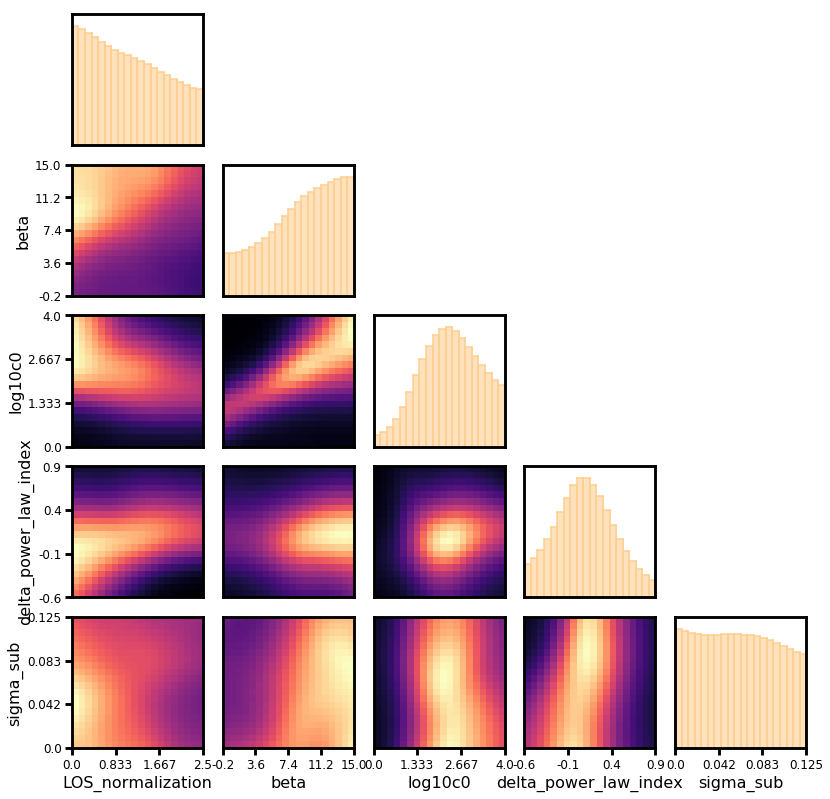

In [21]:
from trikde.triangleplot import TrianglePlot
print(param_ranges)
triangle_plot = TrianglePlot([likelihood])
triangle_plot.set_cmap('magma')
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=False
                                 )
# can change axis labels

In [22]:
from trikde.pdfs import CustomPriorHyperCube
from trikde.kde import KDE 
    
def couple_mass_functions(samples, sigma_sub_theory=0.05, coupling_strength=0.2, edge_coupling=0.2):
    
    delta_los_samples = samples[:, 0]
    sigma_sub_samples = samples[:, -1]
    delta_sigma_sub = sigma_sub_samples/sigma_sub_theory
    
    edge_dlos = 2.5/10
    edge_sigma_sub = 0.1/10
    
    cond1 = delta_los_samples < edge_dlos
    cond2 = sigma_sub_samples < edge_sigma_sub
    inds_1 = np.logical_and(cond1, cond2)
    cond1 = delta_los_samples > 2.5 - edge_dlos
    cond2 = sigma_sub_samples > 0.1 - edge_sigma_sub
    inds_2 = np.logical_and(cond1, cond2)
    
    chi2 = (delta_sigma_sub - delta_los_samples)**2/coupling_strength**2 
    chi2[inds_1] *= coupling_strength ** 2 / edge_coupling ** 2
    chi2[inds_2] *= coupling_strength ** 2 / edge_coupling ** 2
    
    return chi2

kwargs_1 = {'sigma_sub_theory': 0.05}
prior_on_mass_functions_1 = CustomPriorHyperCube(couple_mass_functions, param_names, param_ranges, 
                                                 nbins, kwargs_1)
likelihoods_coupled_with_prior_mass_functions = likelihoods + [prior_on_mass_functions_1]
likelihood_coupled_with_prior_mass_functions_1 = IndepdendentLikelihoods(likelihoods_coupled_with_prior_mass_functions)

kwargs_2 = {'sigma_sub_theory': 0.025}
prior_on_mass_functions_2 = CustomPriorHyperCube(couple_mass_functions, param_names, param_ranges, nbins, kwargs_2)
likelihoods_coupled_with_prior_mass_functions = likelihoods + [prior_on_mass_functions_2]
likelihood_coupled_with_prior_mass_functions_2 = IndepdendentLikelihoods(likelihoods_coupled_with_prior_mass_functions)

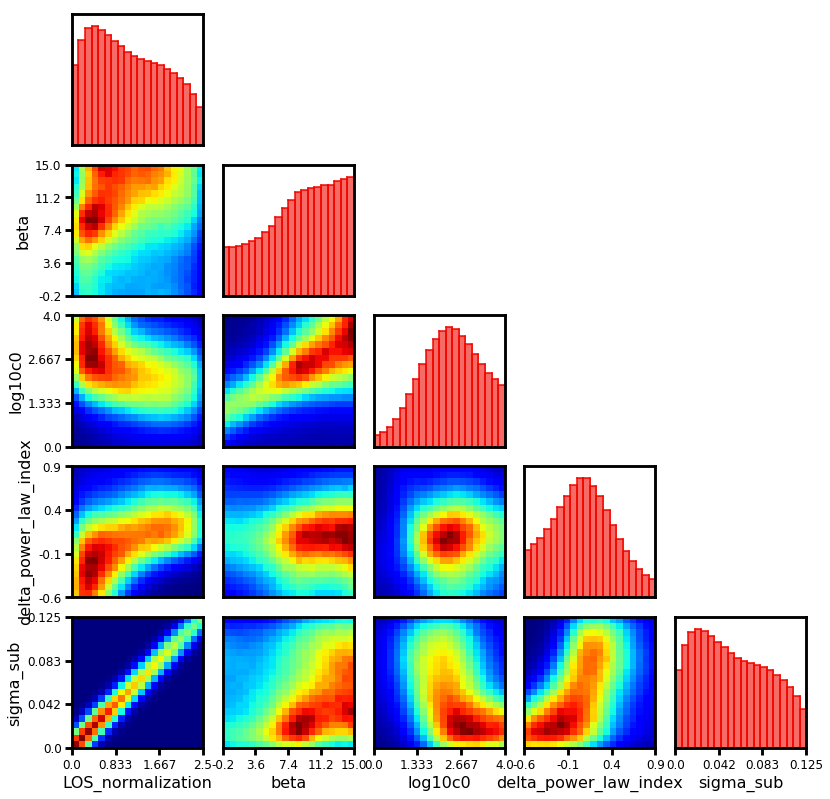

In [23]:
triangle_plot = TrianglePlot([likelihood_coupled_with_prior_mass_functions_1])
triangle_plot.set_cmap('jet')
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=False
                                 )

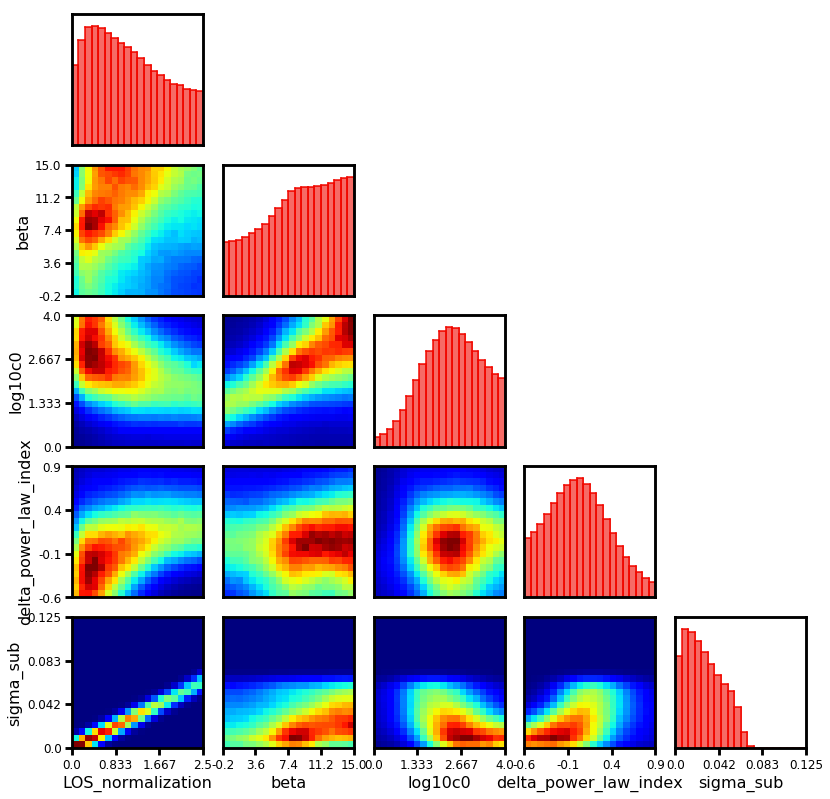

In [24]:
triangle_plot = TrianglePlot([likelihood_coupled_with_prior_mass_functions_2])
triangle_plot.set_cmap('jet')
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=False
                                 )

In [ ]:
edge_effect_likelihood = IndepdendentLikelihoods([DensitySamples()])
triangle_plot = TrianglePlot([edge_effect_likelihood])
triangle_plot.set_cmap('magma')